# **Лабораторная работа №3 Метрические методы классификации** 
## **Шкуратова Д.В. МКТ**

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **1. Данные** 

In [114]:
df=  pd.read_csv('fish_data.csv')
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [115]:
sps = df['species'].unique()
sps, sps.size

(array(['Anabas testudineus', 'Coilia dussumieri',
        'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
        'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
        'Sillaginopsis panijus'], dtype=object),
 9)

Дата фрейм содержит информацию о длине и весе по 9 видам рыб


In [116]:
df.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


###  **1.1 Визуализация**

<Axes: xlabel='count', ylabel='species'>

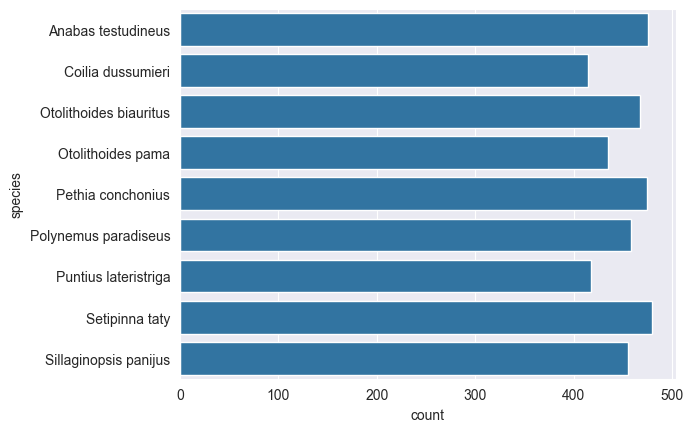

In [117]:
sns.countplot(df['species'])

Видим, что в выборке ни один вид не выделяется по частоте появления

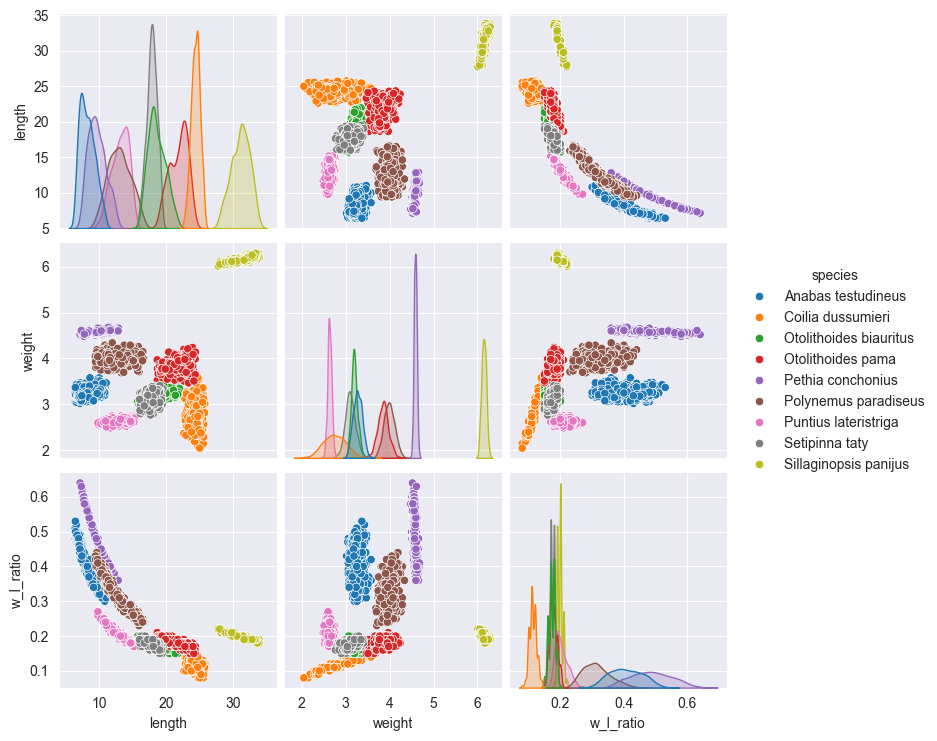

In [118]:
sns.pairplot(df, hue='species')

1. На всех графиках выделяется вид Sillaginopsis panijus
2. На графике $[weight][length]$ выделяются 4 вида: 
    - Anabas testudineus
    - Pethia conchonius
    - Polynemus paradiseus 
    - Puntius lateristriga 
        
По графику можно предположить, что можно успешно построить модель классификации

## **2. Построение модели методом ближайших соседей**


### 2.1 Классификатор

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


def hold_out(test_sz=0.3, k=5):
    X_train, X_holdout, y_train, y_holdout =\
    train_test_split(
                    df.iloc[:, 1:], 
                    df['species'],
                    test_size=test_sz,
                    random_state=10
    )
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Оценка точности hold-out
    knn_pred = knn.predict(X_holdout)
    accur = accuracy_score(y_holdout, knn_pred)
    return accur

Посмотрим как меняется точность метода для разного объема тестовой выборки

### 2.2 Вычисление оценки hold-out для различных значений K и test_size 

Text(0, 0.5, 'Точность модели')

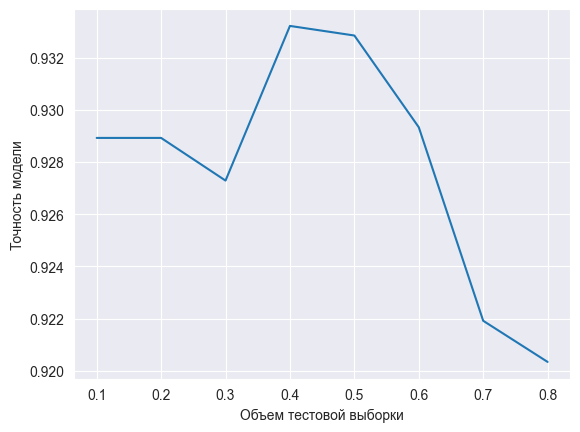

In [120]:
import numpy as np
accur = []
test_size = np.array([i/10 for i in range(1, 9)])
for i in test_size:
        accur.append(hold_out(test_sz=i))
plt.plot(test_size, accur)
plt.xlabel('Объем тестовой выборки')
plt.ylabel('Точность модели')

In [121]:
max_idx = np.argmax(accur)

max_idx, accur[max_idx], accur[2]

(np.int64(3), 0.9332107843137255, 0.9272875816993464)

Получи точность модели 92,7% для test_size = 0.3.
Максимальная точность достигается для test_size = 0.4.
По графику видим, что точность меняется в пределах 1% для разного объема

**Точность в зависимости от количества соседей**

Text(0, 0.5, 'Точность модели')

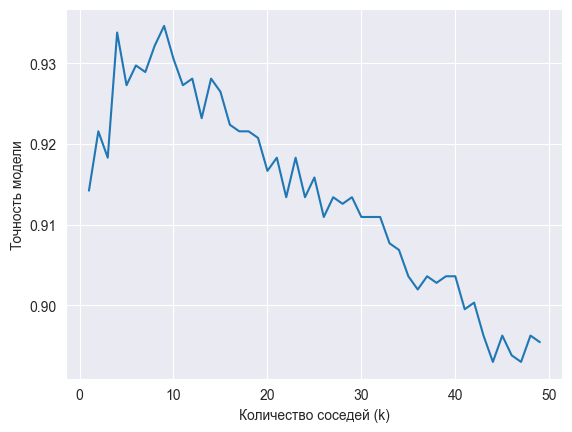

In [122]:
accur = []
k = list(range(1,50))
for i in k:
    accur.append(hold_out(k=i))

plt.plot(k ,accur)
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность модели')

In [123]:
max_idx = np.argmax(accur)
max_idx + 1, accur[max_idx]

(np.int64(9), 0.934640522875817)

Максимальная точность достигается при k=9 для test_size = 0.3

#### 2.3 Оценка качества - cross validation

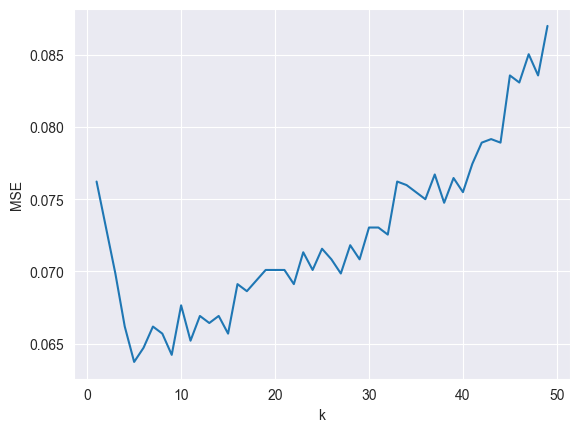

([5], [np.float64(0.06372549019607843)])

In [124]:
from sklearn.model_selection import cross_val_score


k = list(range(1, 50))
cv_score = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, df.iloc[:,1:], df['species'], cv=5, scoring='accuracy')
    cv_score.append(scores.mean())

MSE = [1 - x for x in cv_score]
plt.plot(k, MSE)
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

k_min = min(MSE)
all_min = []
for i in k:
    if MSE[i -1] <= k_min:
        all_min.append(i)
all_min, [MSE[x - 1] for x in all_min]


На $[1, 50]$ оптимально число соседей = 5


Для двух методов оценки получили разные значения k


# Лабораторная работа №4 Логические методы классификации

## 1. Набор данных  
В качестве набора данных также используется 'fish-data.csv'


## 2 Модель классификации на основе дерева классификации



### 2.1 Логический классификатор

In [125]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_holdout, y_train, y_holdout =\
    train_test_split(
                    df.iloc[:, 1:], 
                    df['species'],
                    test_size=0.3,
                    random_state=10
    )
tree = DecisionTreeClassifier(
    max_depth=10,
    random_state=17,
    max_features=9
)
tree.fit(X_train, y_train)

tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
accur

0.9354575163398693

Получили модель с точностью 93%

#### Оценка MSE  для различных значений  параметра max_depth

Text(0, 0.5, 'MSE')

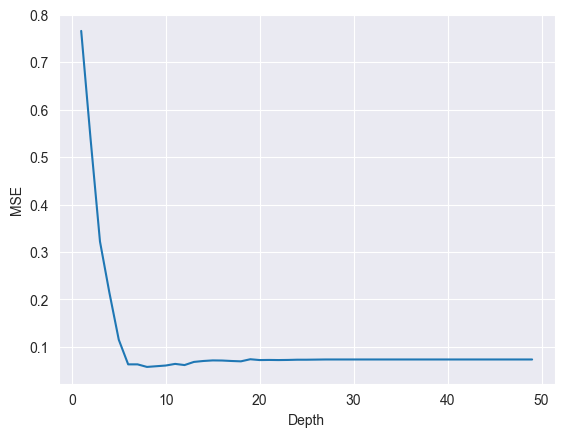

In [126]:
depth = list(range(1, 50))
cv_score = []
for i in depth:
    tree = DecisionTreeClassifier(
        max_depth=i,
        random_state=13,
        max_features=9
    )
    scores = cross_val_score(tree, df.iloc[:, 1:], df['species'], cv = 10, scoring='accuracy')
    cv_score.append(scores.mean())

MSE = [1 - x for x in cv_score]
plt.plot(depth, MSE)
plt.xlabel('Depth')
plt.ylabel('MSE')

In [127]:
min_idx = np.argmin(MSE)
min_idx + 1, MSE[min_idx]

(np.int64(8), np.float64(0.05784313725490209))

Оптимально значение max_depth = 8

Применим GridSearchsCV для оценки обоих параметров 

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
dtc = DecisionTreeClassifier(max_depth=10, random_state=12, max_features=9)
tree_params = {'max_depth': range(1,20), 'max_features':range(1,10)}
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=1)
tree_grid.fit(df.iloc[:, 1:], df['species'])

dot_data = tree.export_graphviz(
    tree_grid.best_estimator_,
    feature_names=df.columns.values[1:],
    class_names=sps,
    out_file = 'fish_tree.dot',
    filled=True, rounded=True
)

Fitting 10 folds for each of 171 candidates, totalling 1710 fits


In [129]:
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features=3, random_state=12)

1. Fold - Количество подмножеств на которые разбивается выборка (параметр cv). Для каждого подмножества модель обучается на n-1 оставшемся и тестируется на текущем
2. Candidates - количество комбинаций оцениваемых параметров. В данном примере мы оцениваем два параметра (max_depth, max_features) $$Candidates = maxDepth.size \cdot maxFeatures.size = 19*9 = 171$$
3. fits - Количество вызовов метода обучения модели fit() $$fits = Candidates\cdot Folds = 171*10 = 1710$$

### 2.5 Tree.png 

[![title](graph.png)]


### 2.6 Решающие границы модели

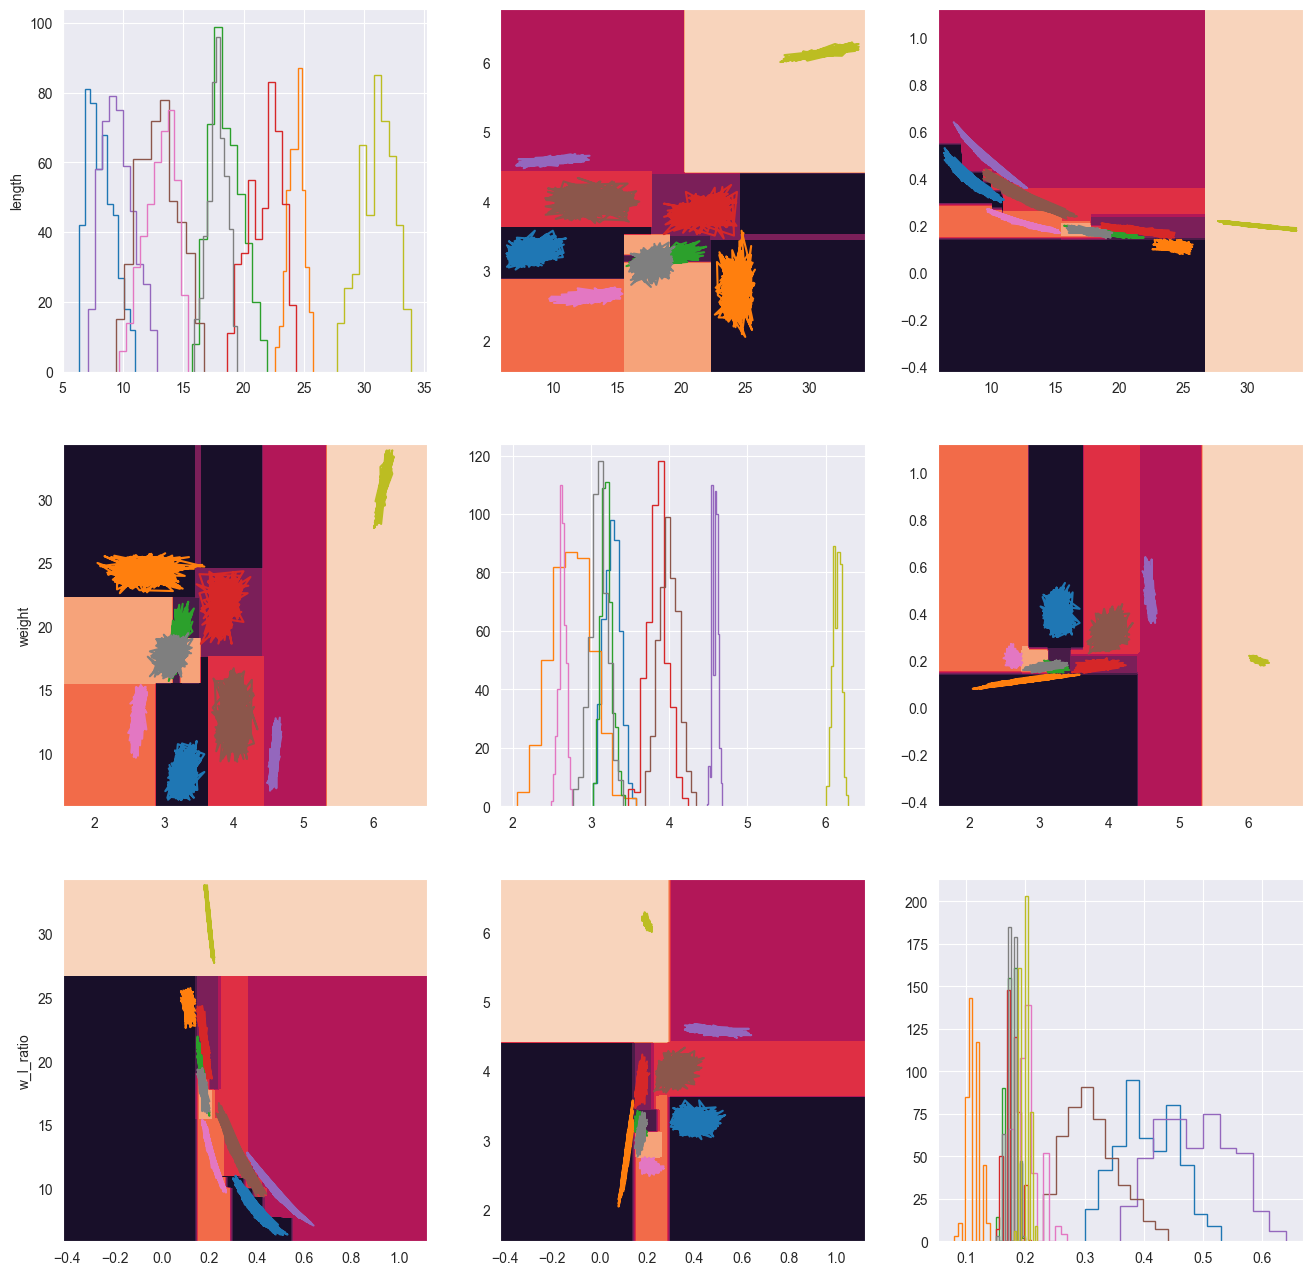

In [130]:
import numpy as np
dX = df.iloc[:, 1:]
answers = df['species'].unique()
dy = df['species']
labels = dX.columns.values


f, places = plt.subplots(3, 3, figsize=(16,16))

fmin = dX.min().values-0.5
fmax = dX.max().values+0.5
plot_step = 0.02

for i in range(0,3):
    for j in range(0,3):
        if i != j:
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step, dtype=float),
                               np.arange(fmin[j], fmax[j], plot_step, dtype=float))
            model = DecisionTreeClassifier(max_depth=8, random_state=21, max_features=3)
            model.fit(dX.iloc[:, [i,j]].values, dy.values)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p==answers[0]] = 0
            p[p==answers[1]] = 1
            p[p==answers[2]] = 2
            p[p==answers[3]] = 3
            p[p==answers[4]] = 4
            p[p==answers[5]] = 5
            p[p==answers[6]] = 6
            p[p==answers[7]] = 7
            p[p==answers[8]] = 8
            p=p.astype('int32')
            places[i,j].contourf(xx, yy, p)
            
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i == j:
                places[i, j].hist(dX.iloc[idx].iloc[:, i],
                                  histtype='step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:, i], dX.iloc[idx].iloc[:, j], label=answers[id_answer], markersize=6)

        if j==0:
          places[i, j].set_ylabel(labels[i])

        if i==3:
          places[i, j].set_xlabel(labels[j])

Видим, что на графике $[Weight][Lenght]$ почти все виды рыб хорошо отличимы